# Программирование на языке Python
## Семинар 9. Pandas

Данные взяты [отсюда](https://github.com/datasets/covid-19).

In [1]:
import pandas as pd
import numpy as np

#### Задание 1
Импортируйте и проведите первичное изучение данных (соответствующим типу каждой переменной).

In [ ]:
# NOTES
# 1 в переменной Province/State есть пропущенные значения
# 2 Recovered имеет тип float, хотя должно бы int -> из-за пропущенных значений
# 3 Date возможно следует перевести в datetime  +++++++++++
# 4 следует поменять названия переменных  +++++++++++
# 5 связаны ли пропущенные значения в двух колонках?

In [2]:
covid = pd.read_csv('time-series-19-covid-combined.csv')
covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [10]:
covid.sample(5)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
168034,2022-02-14,Norway,NaN,1049811,0.0,1513
135604,2020-06-18,Latvia,NaN,1108,903.0,30
40033,2020-03-11,Canada,Nunavut,0,NaN,0
210661,2020-06-03,Ukraine,NaN,25385,10838.0,742
193790,2021-02-23,South Sudan,NaN,7098,4014.0,87


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [3]:
mapper = {
    'old name': 'new name',
}

In [3]:
# пункт 4, 3
covid_renamed = covid.rename(columns=lambda name: name.lower().replace('/', '_'))
covid_renamed['date_dt'] = pd.to_datetime(covid_renamed['date'], format='%Y-%m-%d')

In [15]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [20]:
np.array([np.nan, 1, 2, 3]).mean()

nan

In [16]:
pd.to_datetime(covid_renamed['date'], format='%Y-%m-%d')

0        2020-01-22
1        2020-01-23
2        2020-01-24
3        2020-01-25
4        2020-01-26
            ...    
231739   2022-04-12
231740   2022-04-13
231741   2022-04-14
231742   2022-04-15
231743   2022-04-16
Name: date, Length: 231744, dtype: datetime64[ns]

In [18]:
from datetime import datetime

In [19]:
datetime.strptime('2022-04-12', '%Y-%m-%d')

datetime.datetime(2022, 4, 12, 0, 0)

#### Задание 2
- переименуйте переменные, приведя их к более "стандартному" и удобному виду;
- проверьте данные на корректность: одинаково ли представлена история для всех стран? Есть ли пропущенные значения? Сколько их? По какому принципу они пропущены? Если ответ на эти вопросы вскроет какие-либо несоответствия в данных, предложите причины и варианты решения несоответствий;
- для всех ли стран представлены одни и те же даты? Отсортируйте датасет по стране и дате, чтобы последовательность была строго упорядочена во времени.

In [ ]:
# NOTES
# +++++++++++
# 1 в переменной Province/State есть пропущенные значения -> по некоторым странам есть данные в разрезе регионов -> агрегировать их значения
# +++++++++++
# 2 Recovered имеет тип float, хотя должно бы int -> из-за пропущенных значений  +++++++++++
# 3 Date возможно следует перевести в datetime  +++++++++++
# 4 следует поменять названия переменных  +++++++++++
# 5 связаны ли пропущенные значения в двух колонках? -> скорее всего нет, т. к. нет ни одного случая, когда и там и там NaN   +++++++++++
# 6 необходимо проверить, что сортировка по дате правильная  +++++++++++

# 7 агрегировать значения всех переменных по тем странам, где есть данные по регионам

In [43]:
# пункт 1
covid_renamed[covid_renamed['province_state'].notna()]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
222763,2022-04-12,United Kingdom,Turks and Caicos Islands,5923,0.0,36,2022-04-12
222764,2022-04-13,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-13
222765,2022-04-14,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-14
222766,2022-04-15,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-15


In [4]:
# пункт 1 - продолжение: насколько много стран с данными в разрезе регионов
vc_countries = covid_renamed['country_region'].value_counts()
vc_countries

country_region
China             27744
Canada            13056
United Kingdom    11424
France             9792
Australia          6528
                  ...  
Guinea              816
Guinea-Bissau       816
Guyana              816
Haiti               816
Zimbabwe            816
Name: count, Length: 198, dtype: int64

In [48]:
vc_countries.value_counts()

count
816      190
27744      1
13056      1
11424      1
9792       1
6528       1
4080       1
2448       1
1632       1
Name: count, dtype: int64

In [5]:
# возьмем все страны, для которых count != 816
unusual_countries = vc_countries.index[vc_countries.values != 816]

In [54]:
# Python -> pandas
# and    -> &
# or     -> |
# not    -> ~
# in     -> .isin()

# пункт 5: province_state и recovered
(covid_renamed['province_state'].isna() & covid_renamed['recovered'].isna()).any()

False

In [55]:
(covid_renamed['province_state'].isna() & covid_renamed['recovered'].isna()).sum()

0

In [56]:
(covid_renamed['province_state'].isna() & covid_renamed['recovered'].isna()).value_counts()

False    231744
Name: count, dtype: int64

In [58]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


In [6]:
# пункт 6
covid_sorted = covid_renamed.sort_values(['country_region', 'date'])

**Немного про взятие срезов**

In [26]:
covid_renamed.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


`[]`

In [27]:
# брать колонки
covid_renamed['recovered']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
231739    0.0
231740    0.0
231741    0.0
231742    0.0
231743    0.0
Name: recovered, Length: 231744, dtype: float64

In [28]:
covid_renamed[['recovered', 'deaths']]

,recovered,deaths
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
231739,0.0,5460
231740,0.0,5460
231741,0.0,5462
231742,0.0,5462


In [29]:
covid_renamed[['recovered']]

,recovered
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
231739,0.0
231740,0.0
231741,0.0
231742,0.0


In [30]:
covid_renamed['province_state'].notna()

0         False
1         False
2         False
3         False
4         False
          ...  
231739    False
231740    False
231741    False
231742    False
231743    False
Name: province_state, Length: 231744, dtype: bool

In [31]:
covid_renamed[covid_renamed['province_state'].notna()]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
222763,2022-04-12,United Kingdom,Turks and Caicos Islands,5923,0.0,36,2022-04-12
222764,2022-04-13,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-13
222765,2022-04-14,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-14
222766,2022-04-15,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-15


`.loc[]`

Выбор по НАЗВАНИЮ колонки строки.

In [33]:
covid_renamed.loc[[6, 9, 12], ['date', 'deaths']]  # rows, columns

,date,deaths
6,2020-01-28,0
9,2020-01-31,0
12,2020-02-03,0


In [34]:
covid_renamed.loc[0:6, 'date':'deaths']  # то, что справа, ВКЛЮЧАЕТСЯ, т. к. это не индексы

,date,country_region,province_state,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
5,2020-01-27,Afghanistan,NaN,0,0.0,0
6,2020-01-28,Afghanistan,NaN,0,0.0,0


In [35]:
covid_renamed.loc[0:6, 'deaths':'date']  # пустой DataFrame, т. к. порядок колонок неправильный

""
0
1
2
3
4
5
6


In [36]:
# фильтрация по маске есть
covid_renamed.loc[covid_renamed['province_state'].notna(), :]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
222763,2022-04-12,United Kingdom,Turks and Caicos Islands,5923,0.0,36,2022-04-12
222764,2022-04-13,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-13
222765,2022-04-14,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-14
222766,2022-04-15,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-15


`iloc[]`

Взятие срезов по индексу.

In [38]:
covid_renamed.iloc[0:6, 2:5]  # то, что справа, НЕ ВКЛЮЧАЕТСЯ, т. к. это индексы

,province_state,confirmed,recovered
0,NaN,0,0.0
1,NaN,0,0.0
2,NaN,0,0.0
3,NaN,0,0.0
4,NaN,0,0.0
5,NaN,0,0.0


In [41]:
# фильтрация по маске есть, но только если маска - np.array
covid_renamed.iloc[covid_renamed['province_state'].notna().values, :]

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
7344,2020-01-22,Australia,Australian Capital Territory,0,0.0,0,2020-01-22
7345,2020-01-23,Australia,Australian Capital Territory,0,0.0,0,2020-01-23
7346,2020-01-24,Australia,Australian Capital Territory,0,0.0,0,2020-01-24
7347,2020-01-25,Australia,Australian Capital Territory,0,0.0,0,2020-01-25
7348,2020-01-26,Australia,Australian Capital Territory,0,0.0,0,2020-01-26
...,...,...,...,...,...,...,...
222763,2022-04-12,United Kingdom,Turks and Caicos Islands,5923,0.0,36,2022-04-12
222764,2022-04-13,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-13
222765,2022-04-14,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-14
222766,2022-04-15,United Kingdom,Turks and Caicos Islands,5936,0.0,36,2022-04-15


In [42]:
covid_renamed.iloc[covid_renamed['province_state'].notna(), :]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

**Изучение переменных**

In [62]:
covid_sorted.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


In [7]:
# numeric
numeric = ['confirmed', 'recovered', 'deaths']

In [67]:
covid_sorted.mean(numeric_only=True)

confirmed    513236.172302
recovered    106211.623770
deaths         9760.170231
dtype: float64

In [69]:
covid_sorted[numeric].describe().round(2)

,confirmed,recovered,deaths
count,231744.00,218688.00,231744.00
mean,513236.17,106211.62,9760.17
std,3002239.15,839741.31,49749.87
min,0.00,0.00,0.00
25%,259.00,0.00,2.00
50%,5725.00,55.00,73.00
75%,109564.50,5002.00,1777.00
max,80625120.00,30974748.00,988609.00


#### Задание 3

Перед тем, как выполнять данное задание, подумайте, не лучше ли будет каким-либо образом поменять существующие показатели пандемии.

- как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс заразить кого-нибудь больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа;
- если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [6]:
covid_sorted.head()

,date,country_region,province_state,confirmed,recovered,deaths,date_dt
0,2020-01-22,Afghanistan,NaN,0,0.0,0,2020-01-22
1,2020-01-23,Afghanistan,NaN,0,0.0,0,2020-01-23
2,2020-01-24,Afghanistan,NaN,0,0.0,0,2020-01-24
3,2020-01-25,Afghanistan,NaN,0,0.0,0,2020-01-25
4,2020-01-26,Afghanistan,NaN,0,0.0,0,2020-01-26


In [ ]:
# 7 агрегировать значения всех переменных по тем странам, где есть данные по регионам: вариант 1



In [8]:
# %%timeit
# 7 агрегировать значения всех переменных по тем странам, где есть данные по регионам: вариант 1

# key (date, country_region, province_state) -> (date, country_region)
covid_agg = covid_sorted.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric].sum()
# covid_agg.head()

In [9]:
# %%timeit
# вариант 2
unusual_countries = covid_sorted.loc[covid_sorted['province_state'].notna(), 'country_region'].unique()

covid_to_agg = covid_sorted[covid_sorted['country_region'].isin(unusual_countries)]
covid_notto_agg = covid_sorted[~covid_sorted['country_region'].isin(unusual_countries)].drop(columns=['province_state'])

covid_to_agg_agg = covid_to_agg.groupby(['date', 'date_dt', 'country_region'], as_index=False)[numeric].sum()

covid_agg = pd.concat([covid_to_agg_agg, covid_notto_agg], ignore_index=True)

In [15]:
covid_world = covid_agg.groupby(['date', 'date_dt'], as_index=False)[numeric].sum()

covid_world['confirmed_delta'] = covid_world['confirmed'].diff().fillna(0)
covid_world['recovered_delta'] = covid_world['recovered'].diff().fillna(0)
covid_world['deaths_delta'] = covid_world['deaths'].diff().fillna(0)

for col in numeric:
    covid_world.loc[covid_world[f'{col}_delta'] < 0, f'{col}_delta'] = 0

covid_world.index = covid_world['date_dt']

covid_world.head()

,date,date_dt,confirmed,recovered,deaths,confirmed_delta,recovered_delta,deaths_delta
date_dt,,,,,,,,
2020-01-22,2020-01-22,2020-01-22,557,30.0,17,0.0,0.0,0.0
2020-01-23,2020-01-23,2020-01-23,657,32.0,18,100.0,2.0,1.0
2020-01-24,2020-01-24,2020-01-24,944,39.0,26,287.0,7.0,8.0
2020-01-25,2020-01-25,2020-01-25,1437,42.0,42,493.0,3.0,16.0
2020-01-26,2020-01-26,2020-01-26,2120,56.0,56,683.0,14.0,14.0


In [ ]:
# нужно перейти от накопленной суммы к приросту за день

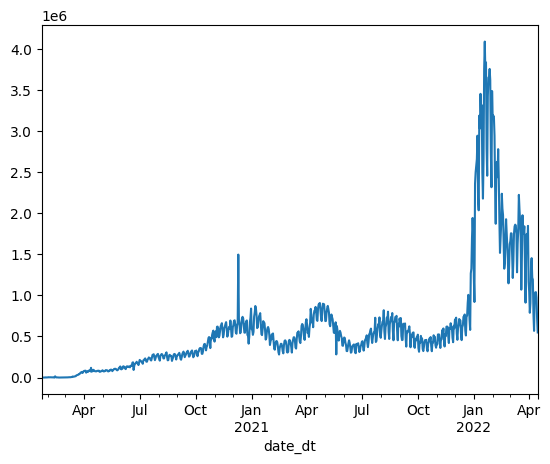

In [32]:
covid_world['confirmed_diff'].plot.line();

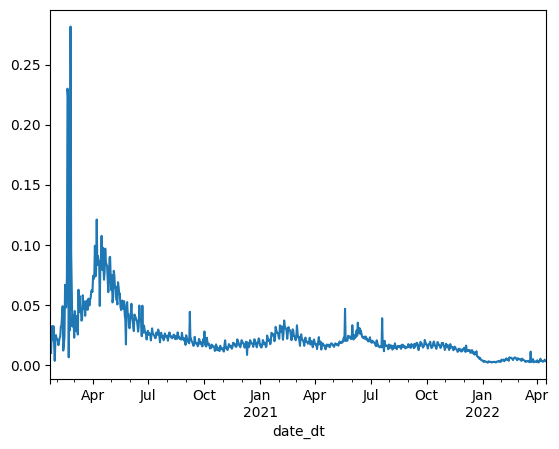

In [37]:
# как меняется соотношения типа обнаруженные / умершие и т. д. во времени (в среднемировом разрезе)?

(covid_world['deaths_diff'] / covid_world['confirmed_diff']).plot.line();

In [35]:
pd.Series([0, 1, 2], index=[0, 1, 2]) - pd.Series([0, 1, 2], index=[3, 4, 5])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
dtype: float64

In [36]:
pd.Series([0, 1, 2], index=[0, 1, 2]).values - pd.Series([0, 1, 2], index=[3, 4, 5]).values

array([0, 0, 0])

если смотреть в среднемировом разрезе, как можно оценить, на какой день болезни шанс умереть больше всего? Попробуйте проверить, можно ли говорить о какой-либо статистической значимости в контексте вашего ответа.

In [ ]:
X ... симптомы ... госпитализация ... выздоровление

In [ ]:
# измерить взаимосвязь между приростом заболевших (с лагом N) и умерших

In [12]:
lags = [*range(51)]
coefs = []

for lag in lags:
    confirmed_shifted = covid_world['confirmed_diff'].shift(lag).fillna(0).values
    coef = np.corrcoef(confirmed_shifted, covid_world['deaths_diff'].values)[0, 1]

    coefs.append(coef)

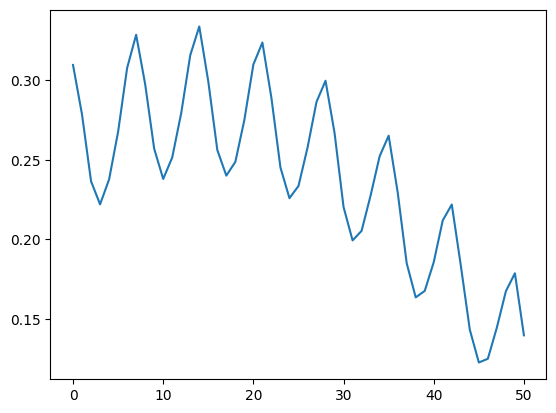

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(lags, coefs);

In [14]:
np.array(coefs).argmax()

14

In [15]:
np.corrcoef(covid_world['confirmed_diff'].values, covid_world['deaths_diff'].values)[0, 1]

0.30937864295218315

In [ ]:
# H0: взаимосвязи нет, корреляция случайна
# необходимо найти распределение корреляций как если бы нулевая гипотеза была верна

# вектор 1 фиксируем
# вектор 2 перемешиваем случайным образом
# считаем коэффициент корреляция
# повторяем много

In [19]:
def simulate_cor(vector1, vector2):
    vector2_p = np.random.permutation(vector2)

    return np.corrcoef(vector1, vector2_p)[0, 1]

N = 100000

random_coefs = np.array(
    [
        simulate_cor(covid_world['confirmed_diff'].shift(14, fill_value=0).values, covid_world['deaths_diff'].values)
        for i
        in range(N)
    ]
)

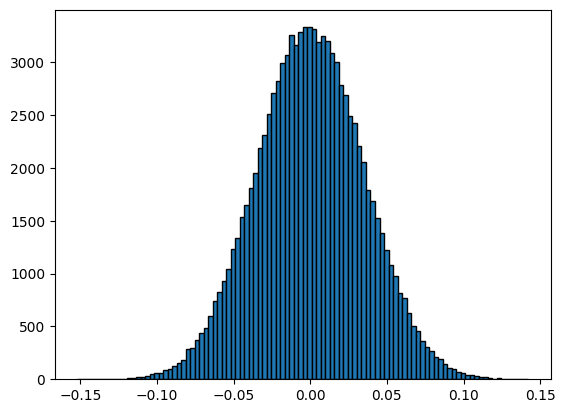

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(random_coefs, bins=100, edgecolor='black');

In [21]:
np.corrcoef(covid_world['confirmed_diff'].shift(14, fill_value=0).values, covid_world['deaths_diff'].values)[0, 1]

0.33347777103125126

#### Задание 4

Изобразите распределение всех трех показателей прироста с помощью:

1. Гистограммы
2. Ящика с усами (boxplot)
3. Функции распределения

На одном графике.

Повторите то же самое для логарифмированных показателей.

In [47]:
def country_diff(minidf: pd.DataFrame) -> pd.DataFrame:
    minidf = minidf.sort_values(by='date_dt')  # create new minidf

    for col in numeric:
        minidf[f'{col}_delta'] = minidf[col].diff().fillna(0)
        minidf.loc[minidf[f'{col}_delta'] < 0, f'{col}_delta'] = 0
        minidf[f'{col}_log'] = np.log(minidf[f'{col}_delta'].values + 1)

    return minidf

covid_delta = covid_agg.groupby(['country_region'], as_index=False).apply(country_diff).reset_index(drop=True)

for col in numeric:
    covid_delta[f'{col}_delta'] = np.log(covid_delta[f'{col}_delta'].values + 1)

In [13]:
import matplotlib.pyplot as plt

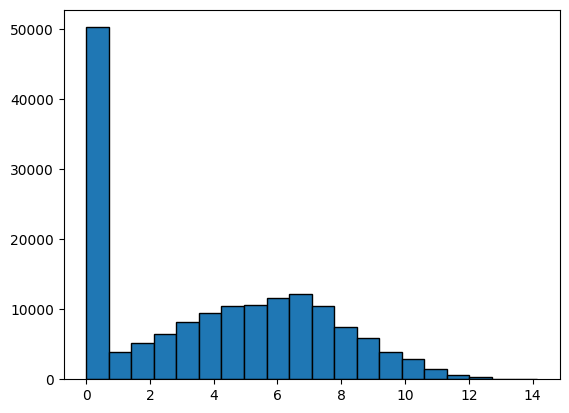

In [52]:
fig, ax = plt.subplots()

ax.hist(covid_delta['confirmed_delta'], bins=20, edgecolor='black');

In [39]:
np.arange(0, 25001, 5000)

array([    0,  5000, 10000, 15000, 20000, 25000])

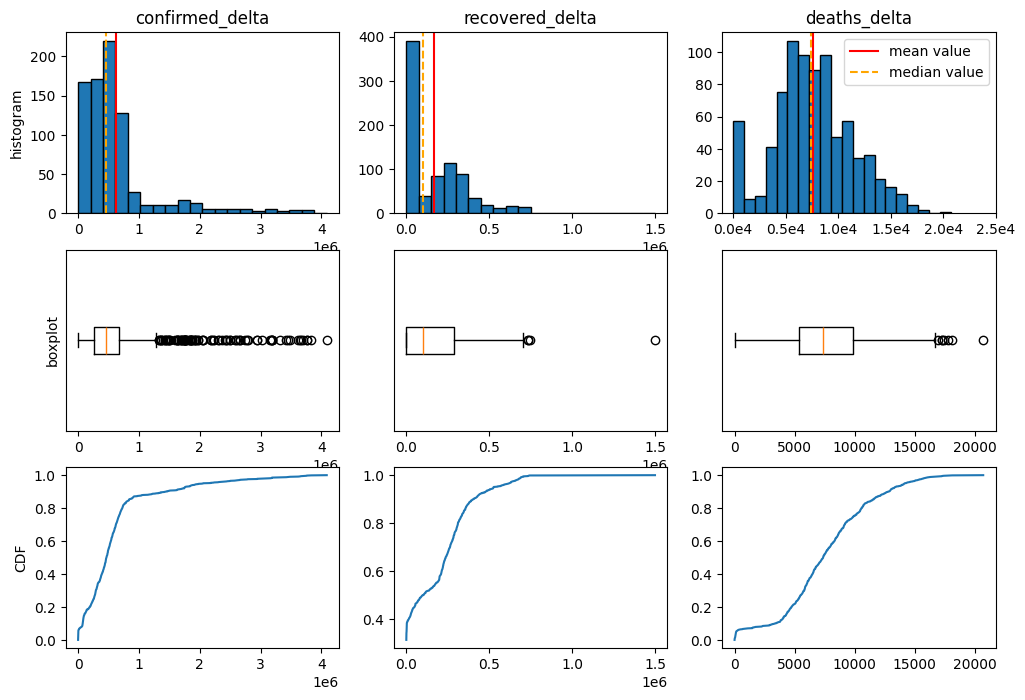

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for index in range(len(numeric)):
    column_name = numeric[index] + '_delta'
    
    column_mean = covid_world[column_name].mean()
    column_median = covid_world[column_name].median()

    deaths_ticks_position = np.arange(0, 25001, 5000)
    deaths_ticks_labels = [f'{str(n / 10000)}e4' for n in deaths_ticks_position.tolist()]
    
    # histogram
    axes[0, index].hist(covid_world[column_name], bins=20, edgecolor='black')
    axes[0, index].set_title(column_name)
    
    axes[0, index].axvline(column_mean, color='red', label='mean value')
    axes[0, index].axvline(column_median, color='orange', linestyle='dashed', label='median value')

    if index == 2:
        axes[0, index].legend()
        axes[0, index].set_xticks(deaths_ticks_position, deaths_ticks_labels)

    if index == 0:
        axes[0, index].set_ylabel('histogram')

    # boxplot
    axes[1, index].boxplot(covid_world[column_name], vert=False)
    axes[1, index].set_yticks([])

    if index == 0:
        axes[1, index].set_ylabel('boxplot')

    # cumulative distribution function (CDF)
    array = np.sort(covid_world[column_name].values)
    farray = (array <= array.reshape((array.size, 1))).mean(axis=1)

    axes[2, index].plot(array, farray)

    if index == 0:
        axes[2, index].set_ylabel('CDF')

In [38]:
?plt.set_xticks

Object `plt.set_xticks` not found.


In [ ]:
по оси X значения переменной (xi), а по оси Y значения F(xi)

In [20]:
array = np.sort(covid_world['confirmed_delta'].values).round().astype(int)

In [32]:
covid_world['confirmed_delta'].sort_values().apply(lambda x: (array <= x).mean())

date_dt
2020-01-22    0.001225
2020-01-23    0.002451
2020-01-24    0.003676
2020-02-23    0.004902
2020-02-12    0.006127
                ...   
2022-01-20    0.995098
2022-01-27    0.996324
2022-01-18    0.997549
2022-01-21    0.998775
2022-01-19    1.000000
Name: confirmed_delta, Length: 816, dtype: float64

In [24]:
(array <= 382).mean()

0.004901960784313725

In [21]:
array

array([      0,     100,     287,     382,     418,     493,     500,
           561,     568,     589,     630,     683,     809,     854,
           973,    1345,    1424,    1690,    1762,    1876,    1882,
          1983,    2035,    2043,    2068,    2111,    2143,    2183,
          2325,    2380,    2609,    2611,    2651,    2717,    2731,
          3031,    3100,    3162,    3594,    3745,    3850,    3930,
          4012,    4146,    4327,    4749,    4809,    6528,    6755,
          7520,   10944,   11259,   13290,   14518,   15152,   15297,
         17657,   27116,   29544,   32415,   34472,   42084,   42904,
         51115,   56231,   60086,   61414,   63937,   65249,   68979,
         69146,   70872,   70922,   71622,   72025,   74161,   74511,
         75253,   75419,   75856,   75908,   75976,   76273,   76661,
         77344,   77385,   77813,   78189,   78354,   78408,   78428,
         79639,   81565,   81937,   81997,   82307,   82616,   83507,
         83841,   84

In [26]:
array.reshape((array.size, 1))

array([[      0],
       [    100],
       [    287],
       [    382],
       [    418],
       [    493],
       [    500],
       [    561],
       [    568],
       [    589],
       [    630],
       [    683],
       [    809],
       [    854],
       [    973],
       [   1345],
       [   1424],
       [   1690],
       [   1762],
       [   1876],
       [   1882],
       [   1983],
       [   2035],
       [   2043],
       [   2068],
       [   2111],
       [   2143],
       [   2183],
       [   2325],
       [   2380],
       [   2609],
       [   2611],
       [   2651],
       [   2717],
       [   2731],
       [   3031],
       [   3100],
       [   3162],
       [   3594],
       [   3745],
       [   3850],
       [   3930],
       [   4012],
       [   4146],
       [   4327],
       [   4749],
       [   4809],
       [   6528],
       [   6755],
       [   7520],
       [  10944],
       [  11259],
       [  13290],
       [  14518],
       [  15152],
       [  

In [29]:
array.size

816

In [30]:
array <= array.reshape((array.size, 1))

array([[ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [28]:
(array <= array.reshape((array.size, 1))).mean(axis=1)

array([0.00122549, 0.00245098, 0.00367647, 0.00490196, 0.00612745,
       0.00735294, 0.00857843, 0.00980392, 0.01102941, 0.0122549 ,
       0.01348039, 0.01470588, 0.01593137, 0.01715686, 0.01838235,
       0.01960784, 0.02083333, 0.02205882, 0.02328431, 0.0245098 ,
       0.02573529, 0.02696078, 0.02818627, 0.02941176, 0.03063725,
       0.03186275, 0.03308824, 0.03431373, 0.03553922, 0.03676471,
       0.0379902 , 0.03921569, 0.04044118, 0.04166667, 0.04289216,
       0.04411765, 0.04534314, 0.04656863, 0.04779412, 0.04901961,
       0.0502451 , 0.05147059, 0.05269608, 0.05392157, 0.05514706,
       0.05637255, 0.05759804, 0.05882353, 0.06004902, 0.06127451,
       0.0625    , 0.06372549, 0.06495098, 0.06617647, 0.06740196,
       0.06862745, 0.06985294, 0.07107843, 0.07230392, 0.07352941,
       0.0747549 , 0.07598039, 0.07720588, 0.07843137, 0.07965686,
       0.08088235, 0.08210784, 0.08333333, 0.08455882, 0.08578431,
       0.0870098 , 0.08823529, 0.08946078, 0.09068627, 0.09191

In [25]:
array  array.reshape((array.size, 1))

array([[      0],
       [    100],
       [    287],
       [    382],
       [    418],
       [    493],
       [    500],
       [    561],
       [    568],
       [    589],
       [    630],
       [    683],
       [    809],
       [    854],
       [    973],
       [   1345],
       [   1424],
       [   1690],
       [   1762],
       [   1876],
       [   1882],
       [   1983],
       [   2035],
       [   2043],
       [   2068],
       [   2111],
       [   2143],
       [   2183],
       [   2325],
       [   2380],
       [   2609],
       [   2611],
       [   2651],
       [   2717],
       [   2731],
       [   3031],
       [   3100],
       [   3162],
       [   3594],
       [   3745],
       [   3850],
       [   3930],
       [   4012],
       [   4146],
       [   4327],
       [   4749],
       [   4809],
       [   6528],
       [   6755],
       [   7520],
       [  10944],
       [  11259],
       [  13290],
       [  14518],
       [  15152],
       [  

In [41]:
5, 6, 1, -8, 0

-8, 0, 1, 5, 6

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [ ]:
F(1) = 0.6
F(6) = 1
F(-100) = 0

In [ ]:
F(x) = P(X <= x)

#### Задание 5

Изобразите для шести понравившихся вам стран взаимосвязь между логарифмированными показателями прироста заболевших и умерших (по графику на страну, все на одной картинке). Сделайте это тремя способами: с помощью `matplotlib`, `seaborn` и `plotly`.

In [48]:
chosen_countries = ['Australia', 'Austria', 'Algeria', 'China', 'Argentina', 'US']

covid_delta_f = covid_delta[covid_delta['country_region'].isin(chosen_countries)].reset_index(drop=True)

In [ ]:
X = data['time_study'].values
Y = data['marks'].values

a, b = np.polyfit(X, Y, 1)

Y_pred = a * X + b

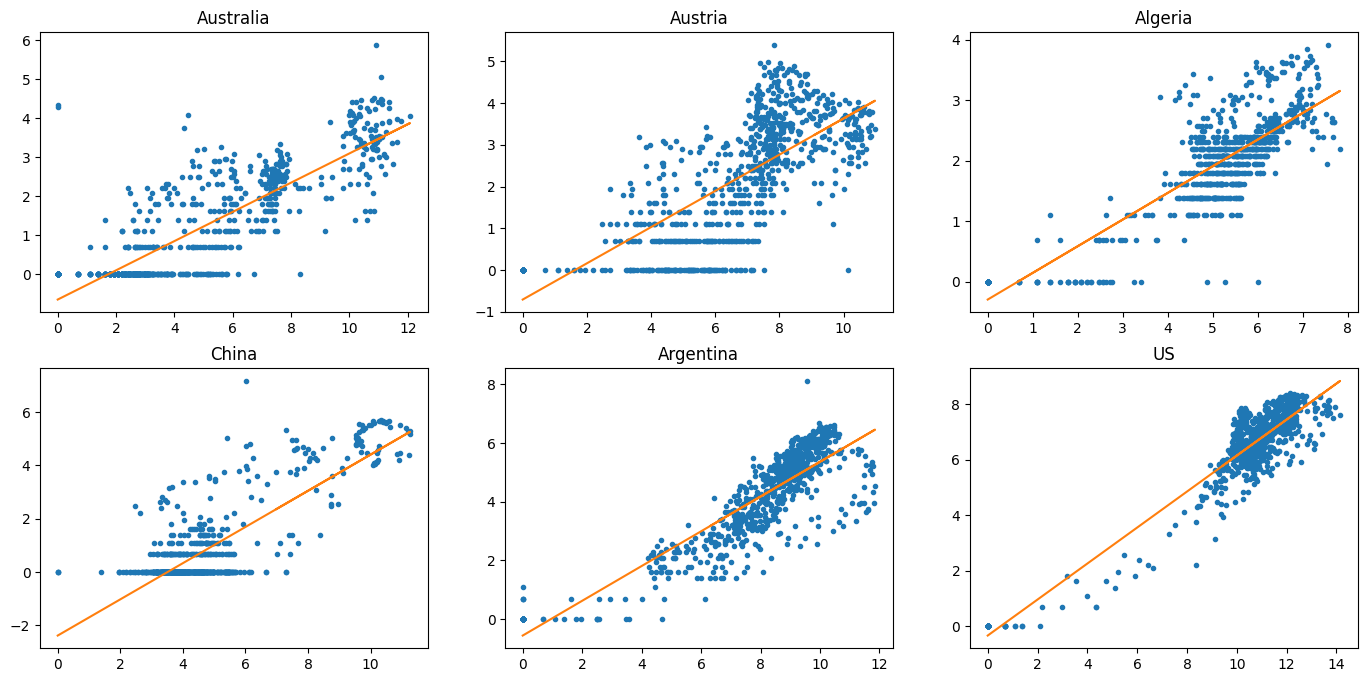

In [61]:
# matplotlib
len_cc = len(chosen_countries)

fig, axes = plt.subplots(2, 3, figsize=(17, 8))

for index in range(len_cc):
    country = chosen_countries[index]
    country_df = covid_delta_f[covid_delta_f['country_region'] == country]

    row_index = index // 3
    col_index = index % 3

    X = country_df['confirmed_log'].values
    y = country_df['deaths_log'].values

    a, b = np.polyfit(X, y, 1)
    y_pred = a * X + b
    
    axes[row_index, col_index].plot(X, y, '.')
    axes[row_index, col_index].plot(X, y_pred)
    
    axes[row_index, col_index].set_title(country)

In [41]:
# seaborn

In [64]:
import seaborn as sns

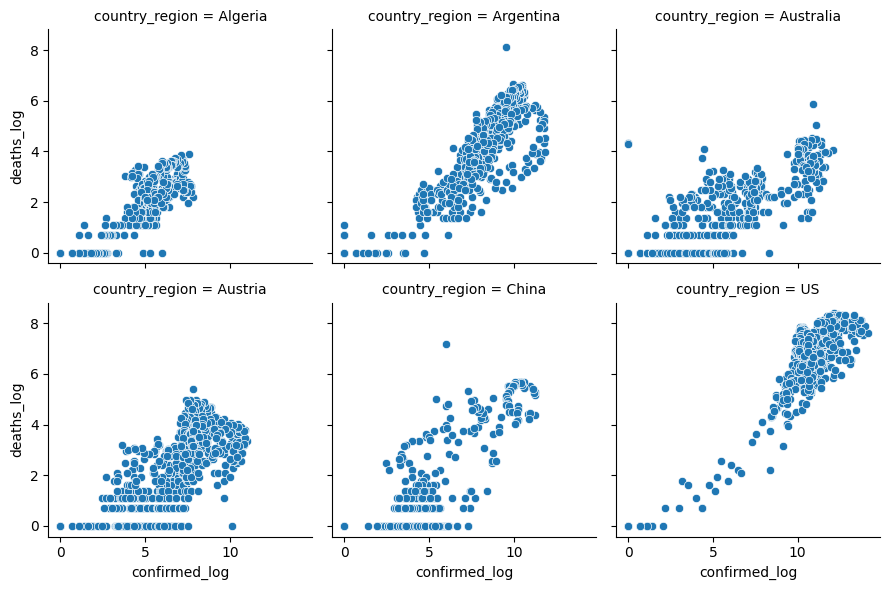

In [69]:
grid = sns.FacetGrid(covid_delta_f, col='country_region', col_wrap=3)

grid.map(sns.scatterplot, 'confirmed_log', 'deaths_log');

In [73]:
import plotly.express as px 
  
fig = px.scatter(covid_delta_f,
                 x="confirmed_log",
                 y="deaths_log",
                 color="country_region") 
fig.show()